In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df['target_names'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

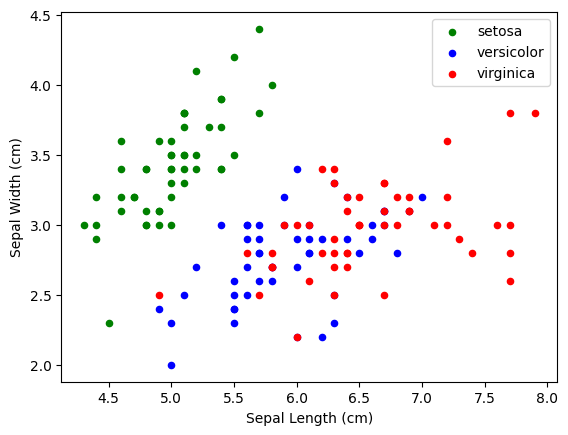

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",s=20, label=iris.target_names[0])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",s=20, label=iris.target_names[1])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color="red",s=20, label=iris.target_names[2])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend();

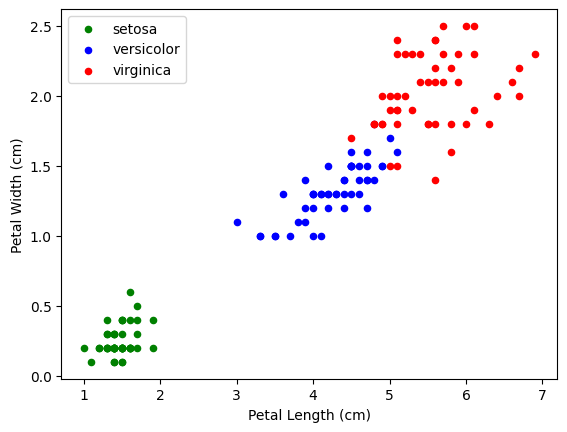

In [11]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",s=20, label=iris.target_names[0])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="blue",s=20, label=iris.target_names[1])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="red",s=20, label=iris.target_names[2])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend();

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','target_names'], axis='columns'),df['target'],test_size=0.2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
knn.score(X_test,y_test)

1.0

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

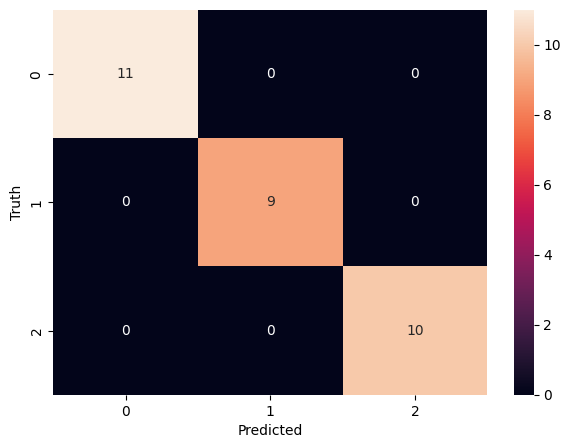

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')